In [1]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import json
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import glob
import os

path = '/content/drive/MyDrive/senior_thesis/comparison_essay_grading/final_outputs'

dfs = {}
for filename in os.listdir(path):
  if filename.endswith('.csv'):
    file_path = os.path.join(path, filename)

    df = pd.read_csv(file_path)
    filename = filename[:-4]
    df = df.set_index(['id_1', 'id_2', 'prompt'])
    df['correct'] = df['correct'].astype(str).str.strip()
    df['correct'] = df['correct'].str.replace('True', '1')
    df['correct'] = df['correct'].str.replace('False', '0')
    df['correct'] = df['correct'].astype(int)
    dfs[filename] = df.copy()

In [4]:
dfs.keys()

dict_keys(['flan-t5', 'qwen-2.5-7b-it', 'qwen-2.5-7b-it-1m', 'qwen-2.5-3b-it', 'qwen-2.5-0.5b-it', 'qwen-2.5-1.5b-it', 'gemma-2b', 'gemma-7b', 'gemma-2-2b_raw', 'llama-3.2-3b-it', 'llama-3-8b-it', 'llama-3.2-1b-it', 'flan-t5-base', 'flan-t5-xl', 'flan-t5-small', 'flan-t5-large', 'llama-3.2-3b', 'gemma-2-2b-it', 'gemma-1.1-2b-it', 'phi-3-mini-4k-instruct', 'phi-3-medium-4k-instruct', 'phi-3.5-mini-instruct', 'mistral-7B-instruct-v0.1', 'mistral-8B-instruct-2410', 'mistral-nemo-instruct-2407', 'mistral-7B-instruct-v0.3', 'olmo-7b-it', 'gpt2-xl', 'gpt2-small', 'olmoe-1b-7b-0924-it', 'gpt2-large', 'gpt2-medium', 'phi-4-mini-instruct'])

In [ ]:
dfs['gemma-7b']

,,,correct
id_1,id_2,prompt,
A828480AA508,AA8DA5629CBC,Benefits of a good attitude,1
65B7FDE783F2,1732E7BCD28D,Four-day work week,1
7DC02C918305,98BD2D5840A1,Positive attitudes,0
6060D28C05B6,5AC16E188F1B,Distance learning,1
3F3DC123EDF6,CBFD5CD8BCD9,Curfews for teenagers,1
...,...,...,...
9A24CB0724FE,0F19DD8FEEDC,Community service,1
389B7B042C94,1E072DC647AC,Four-day work week,0
D58980F5EC66,9EB7D09C785B,Distance learning,0


In [5]:
data = pd.DataFrame(columns=['id_1', 'id_2', 'prompt'])
data = data.set_index(['id_1', 'id_2', 'prompt'])
for key, item in dfs.items():
  item = item.add_suffix(f'_{key}')
  item = item.rename(columns={f'correct_{key}': f'{key}'})
  data = pd.concat([data, item], axis=1, join='outer')

In [6]:
data = data.reset_index()
data.head()

,id_1,id_2,prompt,flan-t5,qwen-2.5-7b-it,qwen-2.5-7b-it-1m,qwen-2.5-3b-it,qwen-2.5-0.5b-it,qwen-2.5-1.5b-it,gemma-2b,...,mistral-8B-instruct-2410,mistral-nemo-instruct-2407,mistral-7B-instruct-v0.3,olmo-7b-it,gpt2-xl,gpt2-small,olmoe-1b-7b-0924-it,gpt2-large,gpt2-medium,phi-4-mini-instruct
0,A828480AA508,AA8DA5629CBC,Benefits of a good attitude,1,0,0,0,0,0,0,...,0,1,1,1,1,1,0,1,1,1
1,65B7FDE783F2,1732E7BCD28D,Four-day work week,0,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,0,1
2,7DC02C918305,98BD2D5840A1,Positive attitudes,0,1,1,1,0,0,1,...,1,1,0,0,0,1,0,0,0,1
3,6060D28C05B6,5AC16E188F1B,Distance learning,1,1,1,1,0,1,1,...,1,1,1,1,0,0,0,0,0,1
4,3F3DC123EDF6,CBFD5CD8BCD9,Curfews for teenagers,1,0,0,0,1,0,0,...,0,0,0,0,1,1,0,1,1,0


In [7]:
formatted_data = data.copy()
formatted_data = formatted_data.drop(columns=['id_1', 'id_2', 'prompt'])
formatted_data.head()

,flan-t5,qwen-2.5-7b-it,qwen-2.5-7b-it-1m,qwen-2.5-3b-it,qwen-2.5-0.5b-it,qwen-2.5-1.5b-it,gemma-2b,gemma-7b,gemma-2-2b_raw,llama-3.2-3b-it,...,mistral-8B-instruct-2410,mistral-nemo-instruct-2407,mistral-7B-instruct-v0.3,olmo-7b-it,gpt2-xl,gpt2-small,olmoe-1b-7b-0924-it,gpt2-large,gpt2-medium,phi-4-mini-instruct
0,1,0,0,0,0,0,0,1,1,0,...,0,1,1,1,1,1,0,1,1,1
1,0,1,1,1,1,1,1,1,0,0,...,1,1,0,0,0,0,0,0,0,1
2,0,1,1,1,0,0,1,0,0,0,...,1,1,0,0,0,1,0,0,0,1
3,1,1,1,1,0,1,1,1,0,0,...,1,1,1,1,0,0,0,0,0,1
4,1,0,0,0,1,0,0,1,0,1,...,0,0,0,0,1,1,0,1,1,0


In [8]:
data.to_csv('comp_results.csv')

Model Accuracies (%):
                         Model  Accuracy
0                   Unnamed: 0    4950.0
1     phi-3-medium-4k-instruct      79.0
2                gemma-2-2b-it      78.0
3   mistral-nemo-instruct-2407      77.0
4     mistral-8B-instruct-2410      76.0
5       phi-3-mini-4k-instruct      72.0
6        phi-3.5-mini-instruct      72.0
7                llama-3-8b-it      71.0
8          phi-4-mini-instruct      70.0
9                   flan-t5-xl      70.0
10             gemma-1.1-2b-it      69.0
11    mistral-7B-instruct-v0.1      67.0
12           qwen-2.5-7b-it-1m      66.0
13               flan-t5-large      65.0
14    mistral-7B-instruct-v0.3      65.0
15              qwen-2.5-7b-it      65.0
16                    gemma-2b      64.0
17                flan-t5-base      64.0
18              qwen-2.5-3b-it      63.0
19            qwen-2.5-1.5b-it      60.0
20                    gemma-7b      58.0
21             llama-3.2-3b-it      54.0
22            qwen-2.5-0.5b-it     

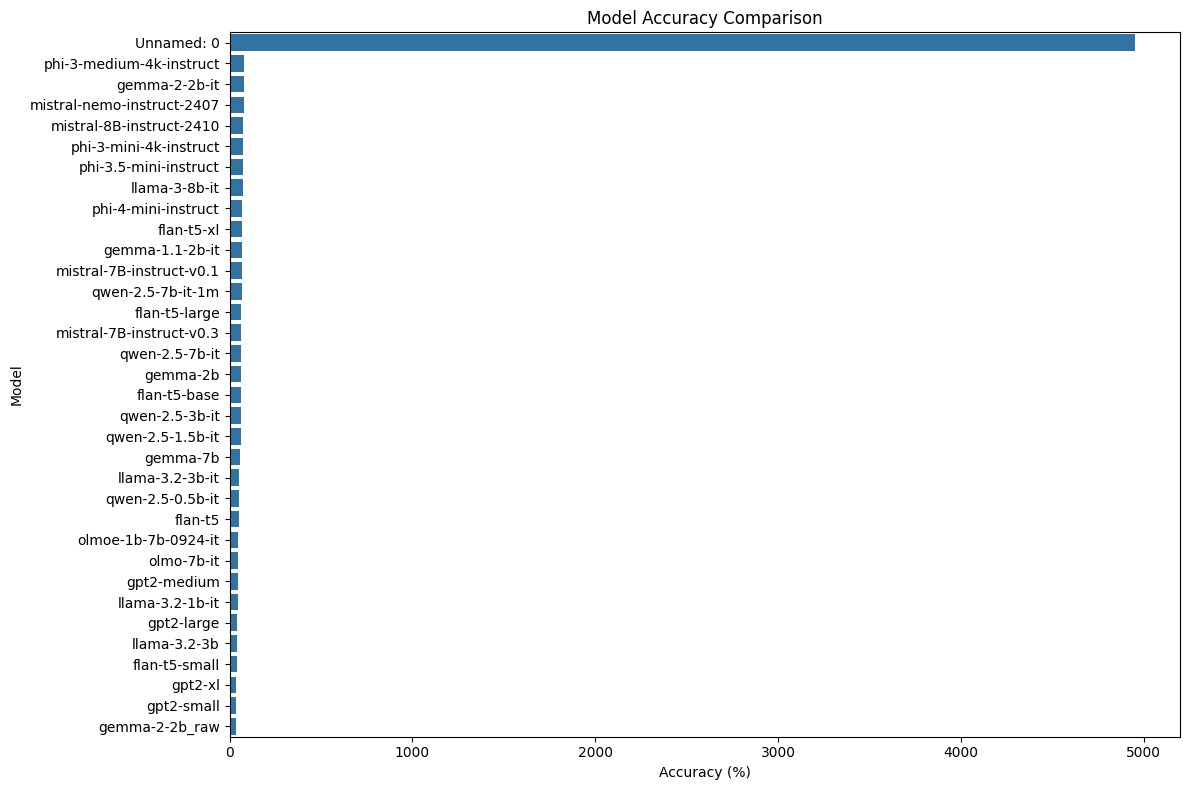


Total number of examples: 100

Best performing model: Unnamed: 0 with accuracy 4950.00%
Worst performing model: gemma-2-2b_raw with accuracy 36.00%


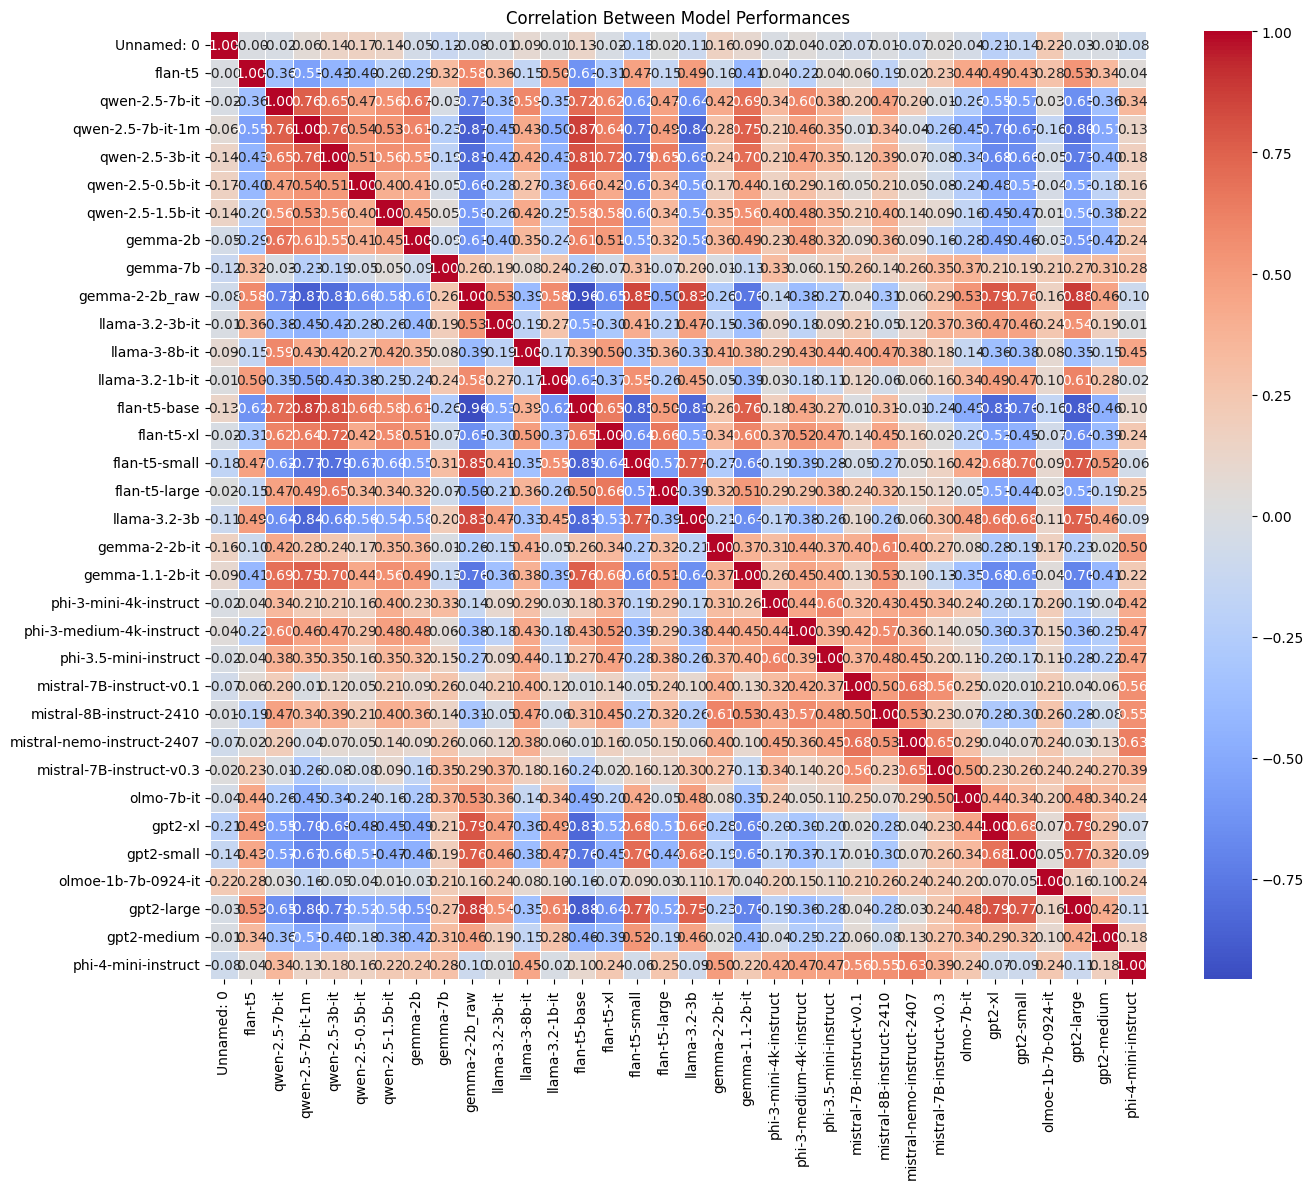

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('comp_results.csv')

# List of model columns (excluding non-model columns)
model_columns = [col for col in df.columns if col not in ['id_1', 'id_2', 'prompt']]

# Calculate accuracy for each model
accuracies = {}
for model in model_columns:
    # Calculate accuracy (assuming 1 is correct and 0 is incorrect)
    accuracy = df[model].mean() * 100  # Convert to percentage
    accuracies[model] = accuracy

# Create a dataframe with the accuracies
accuracy_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])
accuracy_df = accuracy_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)

# Display the accuracies
print("Model Accuracies (%):")
print(accuracy_df)
accuracy_df.to_csv('comp_model_accuracies.csv')

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Accuracy', y='Model', data=accuracy_df)
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy (%)')
plt.ylabel('Model')
plt.tight_layout()
plt.savefig('model_accuracies.png')
plt.show()

# Calculate additional statistics
total_examples = len(df)
print(f"\nTotal number of examples: {total_examples}")

# Get the best and worst performing models
best_model = accuracy_df.iloc[0]
worst_model = accuracy_df.iloc[-1]

print(f"\nBest performing model: {best_model['Model']} with accuracy {best_model['Accuracy']:.2f}%")
print(f"Worst performing model: {worst_model['Model']} with accuracy {worst_model['Accuracy']:.2f}%")

# Calculate correlation between model performances
correlation_matrix = df[model_columns].corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Between Model Performances')
plt.tight_layout()
plt.savefig('model_correlations.png')
plt.show()


In [10]:
model_names = formatted_data.columns.tolist()
formatted_data = formatted_data.to_numpy()

results = {}
for model_name in model_names:
    results[model_name] = {"subject_id": model_name, "responses": {}}

for i in range(formatted_data.shape[0]):
    question_id = f"q{i+1}"

    for j, model_name in enumerate(model_names):
        results[model_name]["responses"][question_id] = int(formatted_data[i, j])

jsonl_output = "\n".join([json.dumps(results[model]) for model in model_names])

with open("formatted_data.jsonl", "w") as f:
    f.write(jsonl_output)

## final try of irt

In [11]:
!pip install pandas pyro-ppl py-irt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [12]:
!py-irt train 1pl formatted_data.jsonl output/output_1pl

[22:16:34] config: model_type='1pl' epochs=2000 priors=None initializers=[] dims=None     ]8;id=658743;file:///usr/local/lib/python3.11/dist-packages/py_irt/cli.py\cli.py]8;;\:]8;id=224129;file:///usr/local/lib/python3.11/dist-packages/py_irt/cli.py#109\109]8;;\
           lr=0.1 lr_decay=0.9999 dropout=0.5 hidden=100 vocab_size=None log_every=100              
           seed=None deterministic=False                                                            
           data_path: formatted_data.jsonl                                                ]8;id=498128;file:///usr/local/lib/python3.11/dist-packages/py_irt/cli.py\cli.py]8;;\:]8;id=541854;file:///usr/local/lib/python3.11/dist-packages/py_irt/cli.py#111\111]8;;\
           output directory: output/output_1pl                                            ]8;id=381612;file:///usr/local/lib/python3.11/dist-packages/py_irt/cli.py\cli.py]8;;\:]8;id=788874;file:///usr/local/lib/python3.11/dist-packages/py_irt/cli.py#1

In [13]:
with open ("output/output_1pl/best_parameters.json","r") as file:
    results = json.load(file)
results.keys()

dict_keys(['ability', 'diff', 'irt_model', 'item_ids', 'subject_ids'])

In [14]:
len(results["diff"])

100

In [15]:
results['subject_ids']

{'0': 'flan-t5',
 '1': 'qwen-2.5-7b-it',
 '2': 'qwen-2.5-7b-it-1m',
 '3': 'qwen-2.5-3b-it',
 '4': 'qwen-2.5-0.5b-it',
 '5': 'qwen-2.5-1.5b-it',
 '6': 'gemma-2b',
 '7': 'gemma-7b',
 '8': 'gemma-2-2b_raw',
 '9': 'llama-3.2-3b-it',
 '10': 'llama-3-8b-it',
 '11': 'llama-3.2-1b-it',
 '12': 'flan-t5-base',
 '13': 'flan-t5-xl',
 '14': 'flan-t5-small',
 '15': 'flan-t5-large',
 '16': 'llama-3.2-3b',
 '17': 'gemma-2-2b-it',
 '18': 'gemma-1.1-2b-it',
 '19': 'phi-3-mini-4k-instruct',
 '20': 'phi-3-medium-4k-instruct',
 '21': 'phi-3.5-mini-instruct',
 '22': 'mistral-7B-instruct-v0.1',
 '23': 'mistral-8B-instruct-2410',
 '24': 'mistral-nemo-instruct-2407',
 '25': 'mistral-7B-instruct-v0.3',
 '26': 'olmo-7b-it',
 '27': 'gpt2-xl',
 '28': 'gpt2-small',
 '29': 'olmoe-1b-7b-0924-it',
 '30': 'gpt2-large',
 '31': 'gpt2-medium',
 '32': 'phi-4-mini-instruct'}

In [16]:
items = pd.DataFrame(
    index=results["item_ids"],
    data= results["diff"],
    columns=["diff"]
)
items.head()

,diff
0,-0.233765
1,-0.557398
2,-0.476900
3,-1.033011
4,0.753953


In [17]:

df = pd.DataFrame.from_dict(results['subject_ids'], orient="index", columns=["models"])
df.index = df.index.astype(int)

df.head()

,models
0,flan-t5
1,qwen-2.5-7b-it
2,qwen-2.5-7b-it-1m
3,qwen-2.5-3b-it
4,qwen-2.5-0.5b-it


In [18]:
subjects = pd.DataFrame(
    index=results["subject_ids"],
    data= results["ability"],
    columns=["ability_1pl"]
)
subjects.set_index(df.index, inplace=True)
subjects = pd.merge(subjects, df, left_index = True, right_index = True)
subjects.head()

,ability_1pl,models
0,-0.592253,flan-t5
1,0.195889,qwen-2.5-7b-it
2,0.326576,qwen-2.5-7b-it-1m
3,0.229720,qwen-2.5-3b-it
4,-0.699566,qwen-2.5-0.5b-it


## Comparing to benchmarks?

In [19]:
#df for abilities from output
thetas = pd.DataFrame({"Model": df['models'], "Theta": subjects['ability_1pl']})
thetas.head()

,Model,Theta
0,flan-t5,-0.592253
1,qwen-2.5-7b-it,0.195889
2,qwen-2.5-7b-it-1m,0.326576
3,qwen-2.5-3b-it,0.229720
4,qwen-2.5-0.5b-it,-0.699566


In [20]:
benchmarks = pd.read_csv("https://docs.google.com/spreadsheets/d/1LNd6CupzqdjRD9nUdihSutqmQN7HU15sM8wAgBGZiQ4/export?format=csv")
benchmarks.head()



,Model,IFEval,Big_Bench_Hard,MuSR
0,qwen-2.5-7b-it-1m,74.48,35.03,9.52
1,qwen-2.5-7b-it,75.85,34.89,8.45
2,qwen-2.5-3b-it,64.75,25.80,7.57
3,qwen-2.5-1.5b-it,44.76,19.81,3.19
4,qwen-2.5-0.5b-it,30.71,8.43,0.94


In [21]:
stats = pd.merge(benchmarks, thetas)
stats.head()

,Model,IFEval,Big_Bench_Hard,MuSR,Theta
0,qwen-2.5-7b-it-1m,74.48,35.03,9.52,0.326576
1,qwen-2.5-3b-it,64.75,25.80,7.57,0.229720
2,qwen-2.5-1.5b-it,44.76,19.81,3.19,-0.040207
3,qwen-2.5-0.5b-it,30.71,8.43,0.94,-0.699566
4,phi-3.5-mini-instruct,57.75,36.75,10.10,0.619482


In [22]:
stats.to_csv('thetas2.csv')

In [23]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler_minmax = MinMaxScaler()
stats_minmax = stats.copy()
stats_minmax[["IFEval", "Big_Bench_Hard", "MuSR", "Theta"]] = scaler_minmax.fit_transform(stats[["IFEval", "Big_Bench_Hard", "MuSR", "Theta"]])

# # should z score instead maybe??? Idk girl
# scaler_std = StandardScaler()
# stats_std = stats.copy()
# stats_std[["IFEval", "Big Bench Hard", "MuSR", "Theta"]] = scaler_std.fit_transform(stats[["IFEval", "Big Bench Hard", "MuSR", "Theta"]])

print(stats_minmax.head())
# print(stats_std.head())


                   Model    IFEval  Big_Bench_Hard      MuSR     Theta
0      qwen-2.5-7b-it-1m  1.000000        0.949663  0.595420  0.707763
1         qwen-2.5-3b-it  0.858122        0.679543  0.460097  0.665593
2       qwen-2.5-1.5b-it  0.566638        0.504243  0.156142  0.548071
3       qwen-2.5-0.5b-it  0.361767        0.171203  0.000000  0.260995
4  phi-3.5-mini-instruct  0.756051        1.000000  0.635670  0.835290


In [24]:
def get_theta_info(stats):

  from scipy.stats import spearmanr

  correlations = {col: spearmanr(stats["Theta"], stats[col])[0] for col in ["IFEval", "Big_Bench_Hard", "MuSR"]}
  print("Spearman Correlations with Theta:", correlations)

    #explained variance
  from sklearn.linear_model import LinearRegression
  X = stats[["IFEval", "Big_Bench_Hard", "MuSR"]]
  y = stats["Theta"]
  reg = LinearRegression().fit(X, y)
  r_squared = reg.score(X, y)
  print("R² of Theta predicting benchmarks:", r_squared)

In [25]:
get_theta_info(stats_minmax)

Spearman Correlations with Theta: {'IFEval': np.float64(0.6601503759398496), 'Big_Bench_Hard': np.float64(0.6466165413533834), 'MuSR': np.float64(0.12330827067669171)}
R² of Theta predicting benchmarks: 0.3954880602401778


In [26]:
!py-irt train 2pl formatted_data.jsonl output/output_2pl --lr 0.03 --epochs 150 --priors vague

[22:17:13] config: model_type='2pl' epochs=150 priors='vague' initializers=[] dims=None   ]8;id=271603;file:///usr/local/lib/python3.11/dist-packages/py_irt/cli.py\cli.py]8;;\:]8;id=540040;file:///usr/local/lib/python3.11/dist-packages/py_irt/cli.py#109\109]8;;\
           lr=0.03 lr_decay=0.9999 dropout=0.5 hidden=100 vocab_size=None log_every=100             
           seed=None deterministic=False                                                            
           data_path: formatted_data.jsonl                                                ]8;id=236746;file:///usr/local/lib/python3.11/dist-packages/py_irt/cli.py\cli.py]8;;\:]8;id=473972;file:///usr/local/lib/python3.11/dist-packages/py_irt/cli.py#111\111]8;;\
           output directory: output/output_2pl                                            ]8;id=908143;file:///usr/local/lib/python3.11/dist-packages/py_irt/cli.py\cli.py]8;;\:]8;id=738363;file:///usr/local/lib/python3.11/dist-packages/py_irt/cli.py#1

In [27]:
with open ("output/output_2pl/best_parameters.json","r") as file:
    results_2 = json.load(file)
results_2.keys()

dict_keys(['ability', 'diff', 'disc', 'irt_model', 'item_ids', 'subject_ids'])

In [28]:
items_2 = pd.DataFrame(
    index=results["item_ids"],
    data= results["diff"],
    columns=["diff"]
)

items_2['disc'] = results_2['disc']
items_2

,diff,disc
0,-0.233765,0.209352
1,-0.557398,0.251150
2,-0.476900,0.230712
3,-1.033011,0.249490
4,0.753953,0.224843
...,...,...
95,-1.313480,0.242806
96,-1.337970,0.251603
97,-0.345912,0.208567
98,-0.694252,0.235299


In [29]:
result = data.reset_index(drop=True)
items_2 = items_2.reset_index(drop=True)

if len(result) == len(items_2):
    items_2['id_1'] = result['id_1'].values
    items_2['id_2'] = result['id_2'].values

items_2

,diff,disc,id_1,id_2
0,-0.233765,0.209352,A828480AA508,AA8DA5629CBC
1,-0.557398,0.251150,65B7FDE783F2,1732E7BCD28D
2,-0.476900,0.230712,7DC02C918305,98BD2D5840A1
3,-1.033011,0.249490,6060D28C05B6,5AC16E188F1B
4,0.753953,0.224843,3F3DC123EDF6,CBFD5CD8BCD9
...,...,...,...,...
95,-1.313480,0.242806,9A24CB0724FE,0F19DD8FEEDC
96,-1.337970,0.251603,389B7B042C94,1E072DC647AC
97,-0.345912,0.208567,D58980F5EC66,9EB7D09C785B
98,-0.694252,0.235299,ACB54B594BF2,F6194DEBEFA7


In [30]:
items_2.to_csv('comp_items_2pl.csv')

In [31]:

df_2 = pd.DataFrame.from_dict(results_2['item_ids'], orient="index", columns=["items"])
df_2.index = df_2.index.astype(int)

df_2

,items
0,q1
1,q2
2,q3
3,q4
4,q5
...,...
95,q96
96,q97
97,q98
98,q99


In [32]:
items_df_2 = pd.merge(items_2, df_2, left_index = True, right_index = True)
items_df_2.head()

,diff,disc,id_1,id_2,items
0,-0.233765,0.209352,A828480AA508,AA8DA5629CBC,q1
1,-0.557398,0.251150,65B7FDE783F2,1732E7BCD28D,q2
2,-0.476900,0.230712,7DC02C918305,98BD2D5840A1,q3
3,-1.033011,0.249490,6060D28C05B6,5AC16E188F1B,q4
4,0.753953,0.224843,3F3DC123EDF6,CBFD5CD8BCD9,q5


In [33]:

df_2 = pd.DataFrame.from_dict(results_2['subject_ids'], orient="index", columns=["models"])
df_2.index = df_2.index.astype(int)

df_2
subjects_2 = pd.DataFrame(
    index=results_2["subject_ids"],
    data= results_2["ability"],
    columns=["ability_2pl"]
)
subjects_2.set_index(df_2.index, inplace=True)
subjects_2 = pd.merge(subjects_2, df_2, left_index = True, right_index = True)
subjects_2.head()



,ability_2pl,models
0,-0.056908,flan-t5
1,1.443924,qwen-2.5-7b-it
2,1.500045,qwen-2.5-7b-it-1m
3,1.387908,qwen-2.5-3b-it
4,0.344428,qwen-2.5-0.5b-it


In [34]:
#df for abilities from output
thetas_2 = pd.DataFrame({"Model": subjects_2['models'], "Theta_2pl": subjects_2['ability_2pl']})
thetas_2


,Model,Theta_2pl
0,flan-t5,-0.056908
1,qwen-2.5-7b-it,1.443924
2,qwen-2.5-7b-it-1m,1.500045
3,qwen-2.5-3b-it,1.387908
4,qwen-2.5-0.5b-it,0.344428
5,qwen-2.5-1.5b-it,1.071629
6,gemma-2b,1.519591
7,gemma-7b,0.838025
8,gemma-2-2b_raw,-1.339244
9,llama-3.2-3b-it,0.456605


In [35]:
stats_2 = pd.merge(benchmarks, thetas_2, on='Model')
stats_2

,Model,IFEval,Big_Bench_Hard,MuSR,Theta_2pl
0,qwen-2.5-7b-it-1m,74.48,35.03,9.52,1.500045
1,qwen-2.5-3b-it,64.75,25.80,7.57,1.387908
2,qwen-2.5-1.5b-it,44.76,19.81,3.19,1.071629
3,qwen-2.5-0.5b-it,30.71,8.43,0.94,0.344428
4,phi-3.5-mini-instruct,57.75,36.75,10.10,1.936332
5,olmoe-1b-7b-0924-it,46.67,14.57,6.07,-0.199497
6,olmo-7b-it,34.73,13.16,4.33,-0.303432
7,llama-3.2-3b-it,73.93,24.06,1.37,0.456605
8,llama-3.2-3b,13.37,14.23,3.81,-1.006175
9,llama-3.2-1b-it,56.98,8.74,2.97,-0.550444


In [36]:
get_theta_info(stats_2)

KeyError: 'Theta'

In [37]:
final_stats = pd.merge(stats_2, thetas, on='Model')
final_stats

,Model,IFEval,Big_Bench_Hard,MuSR,Theta_2pl,Theta
0,qwen-2.5-7b-it-1m,74.48,35.03,9.52,1.500045,0.326576
1,qwen-2.5-3b-it,64.75,25.80,7.57,1.387908,0.229720
2,qwen-2.5-1.5b-it,44.76,19.81,3.19,1.071629,-0.040207
3,qwen-2.5-0.5b-it,30.71,8.43,0.94,0.344428,-0.699566
4,phi-3.5-mini-instruct,57.75,36.75,10.10,1.936332,0.619482
5,olmoe-1b-7b-0924-it,46.67,14.57,6.07,-0.199497,-0.586548
6,olmo-7b-it,34.73,13.16,4.33,-0.303432,-0.684756
7,llama-3.2-3b-it,73.93,24.06,1.37,0.456605,-0.622045
8,llama-3.2-3b,13.37,14.23,3.81,-1.006175,-1.101131
9,llama-3.2-1b-it,56.98,8.74,2.97,-0.550444,-0.785978


In [38]:
final_stats.to_csv('comp_thetas.csv')